In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [207]:
#importing the train  dataset

df_train=pd.read_csv("/Users/ravina/Desktop/train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [208]:
# import the test dataset
df_test=pd.read_csv("/Users/ravina/Desktop/test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [209]:
#merge both train and test data set 
df=df_train.append(df_test)  #you can also do it with merge method
df.head()

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_66022/3693132769.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)  #you can also do it with merge method


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [211]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [212]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [213]:
#convert categorical features into numerical
#df["Gender"]=pd.get_dummies(df['Gender'],drop_first=True)

In [214]:
#another convenient method to handle the categorical feature
df['Gender']=df['Gender'].map({"F":0,"M":1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [215]:
#handle categorical feature Age
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [216]:
#pd.get_dummies(df['Age'],drop_first=True), don't use ranking method as we did before.
#Labelebcoding is another method 
#from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
#df['Age']= label_encoder.fit_transform(df['Age'])
  
#df['Age'].unique()


In [217]:
df['Age']=df['Age'].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [218]:
#pd.get_dummies(df["City_Category"],drop_first=True)
#drop City_Category 
df.drop('City_Category',axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0


In [219]:
#let's check the missing values
#df.isnull.sum() or 
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [220]:
## focus on replacing the missing values 
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [221]:
df["Product_Category_2"].mode()[0]   #without index [0] we will get a series

8.0

In [222]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [223]:
df["Product_Category_2"].isna().sum()

0

In [224]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [225]:
df["Product_Category_3"].isna().sum()

0

In [226]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [227]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0


In [228]:
df.drop("Product_ID", axis=1)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,2,0,3,8.0,16.0,8370.0
1,0,1,10,2,0,1,6.0,14.0,15200.0
2,0,1,10,2,0,12,8.0,16.0,1422.0
3,0,1,10,2,0,12,14.0,16.0,1057.0
4,1,7,16,4+,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4+,1,8,8.0,16.0,NaN
233595,0,3,15,4+,1,5,8.0,16.0,NaN
233596,0,3,15,4+,1,1,5.0,12.0,NaN
233597,0,5,1,4+,0,10,16.0,16.0,NaN


In [229]:
#df["Stay_In_Current_City_Years"].value_counts()

In [230]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+"," ")

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_66022/1102137257.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+"," ")


In [231]:
df["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4     120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 65.8+ MB


In [233]:
# we need to convert all the objects into intezers. here we have Stay_In_Current_City_Years object type 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

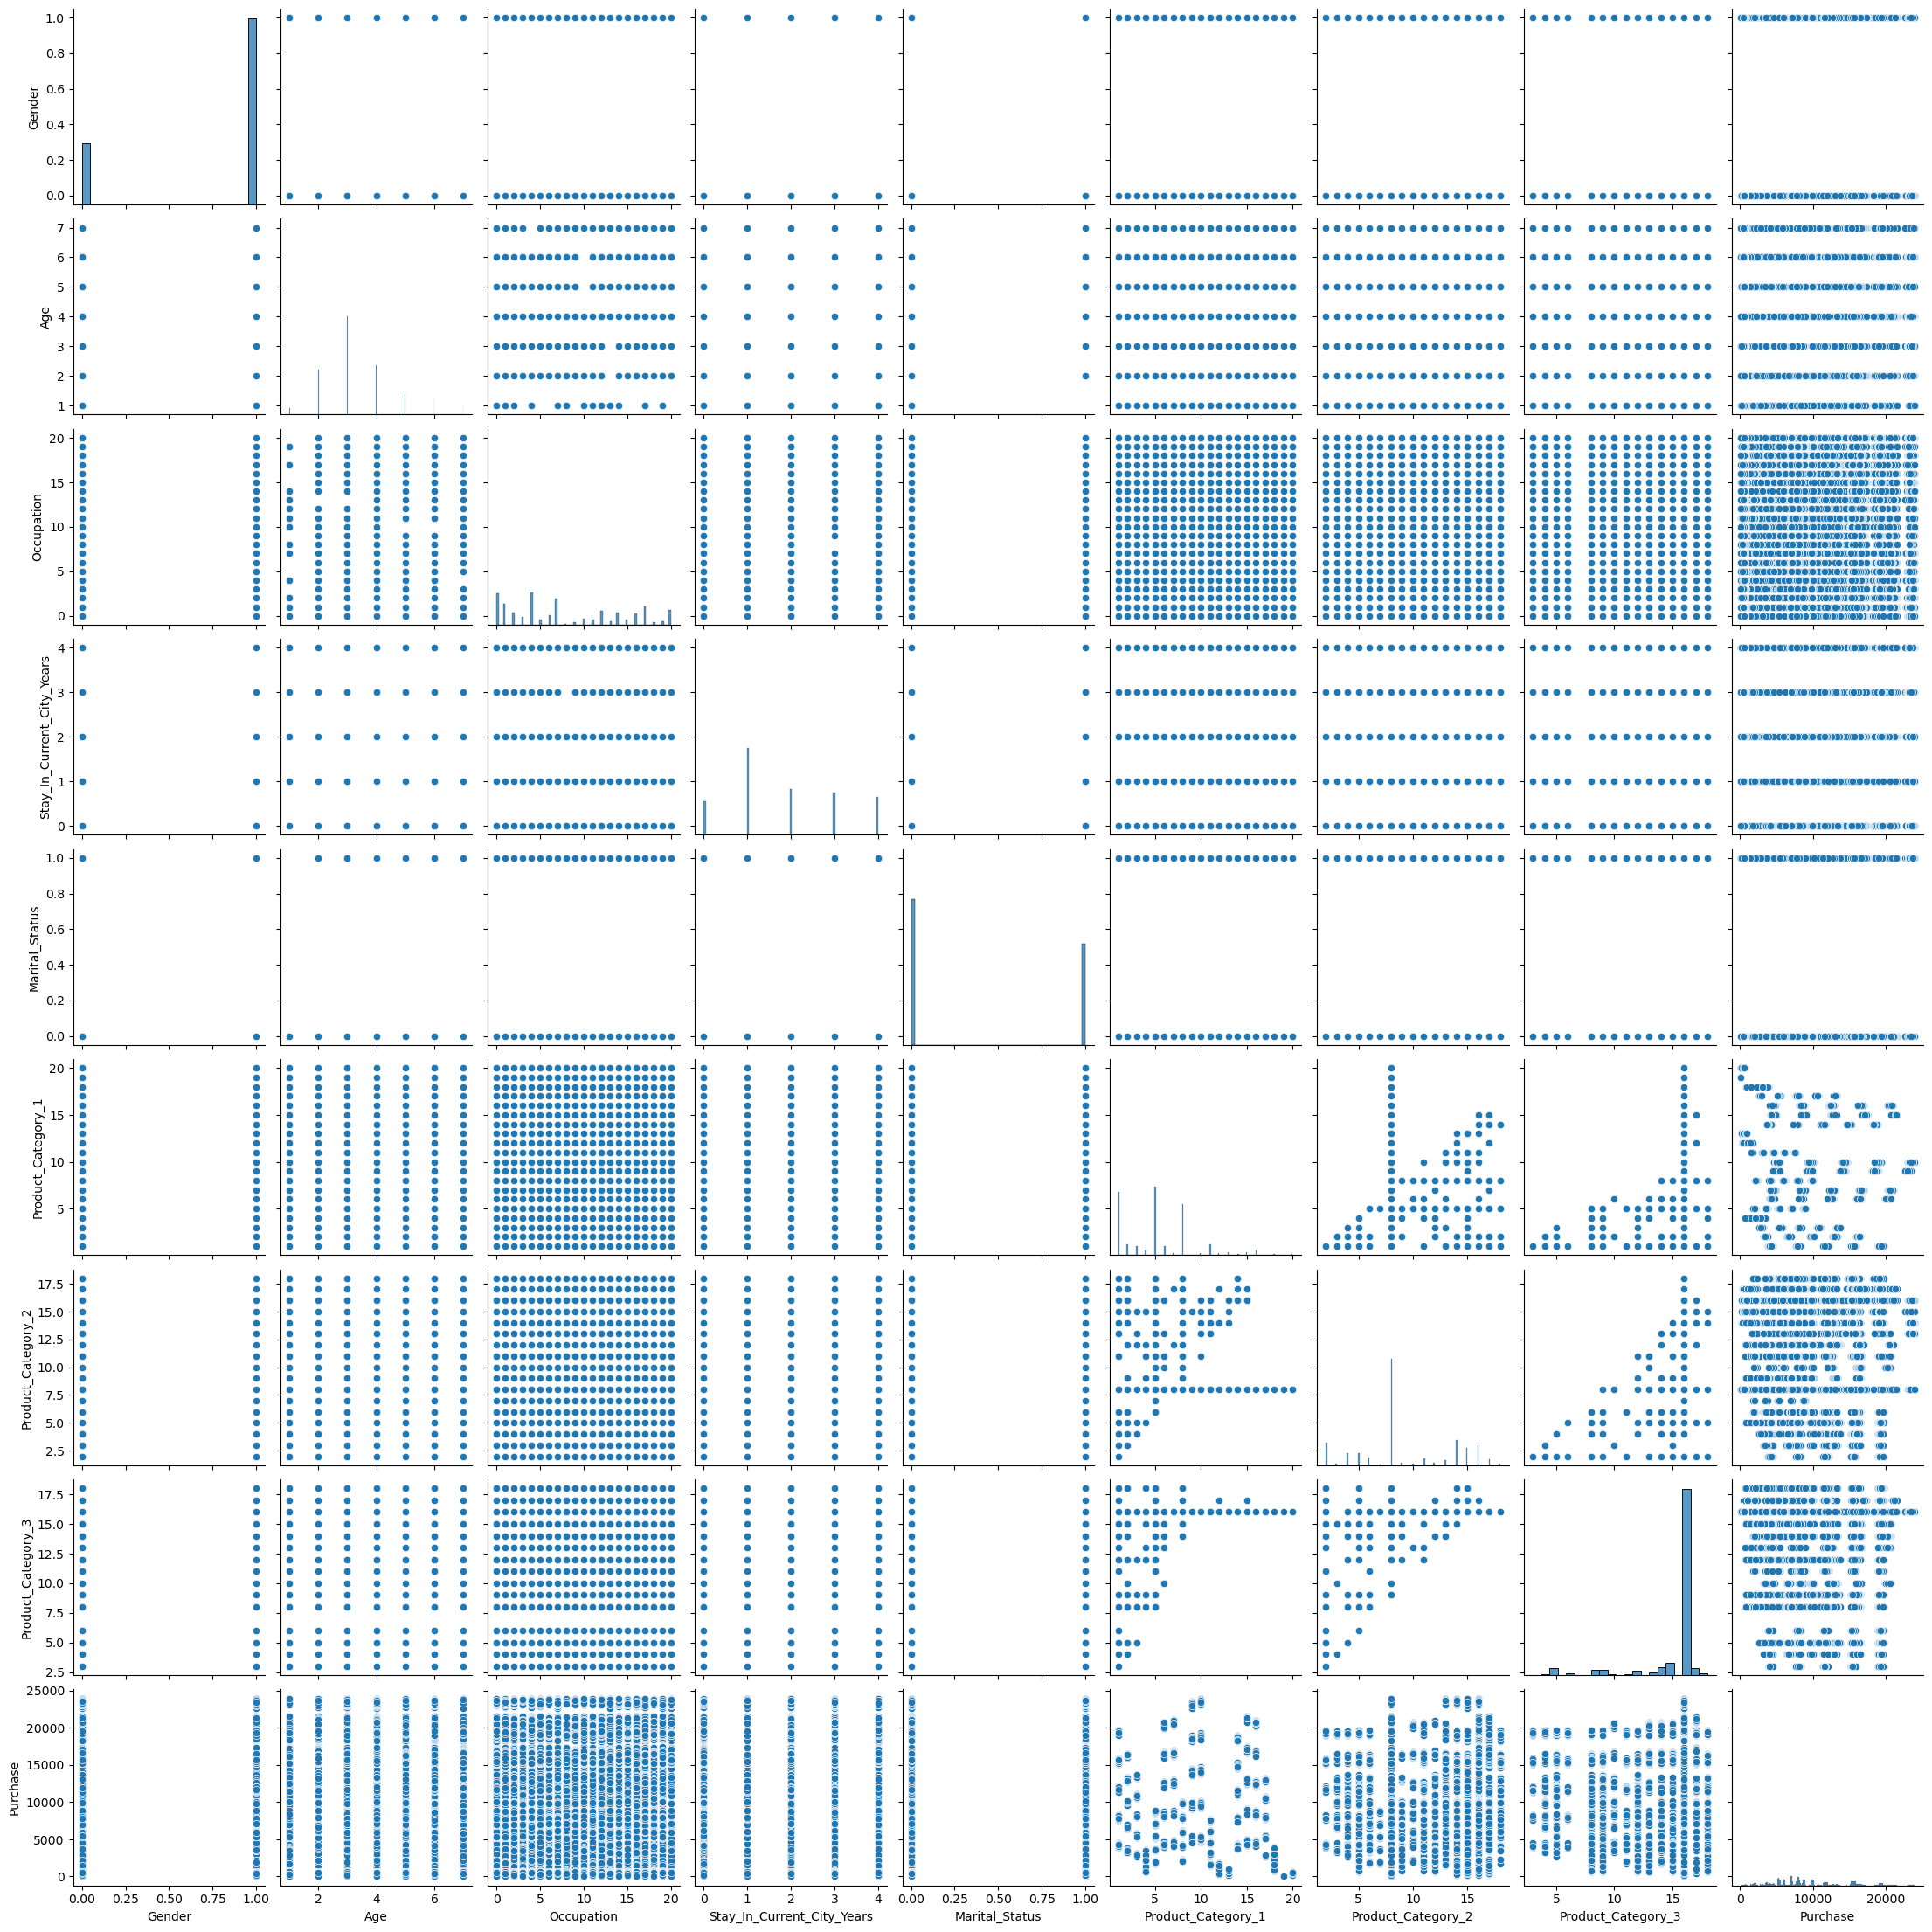

In [234]:
#Visualization
sns.pairplot(df)


In [238]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,2,0,3,8.0,16.0,8370.0
1,0,1,10,2,0,1,6.0,14.0,15200.0
2,0,1,10,2,0,12,8.0,16.0,1422.0
3,0,1,10,2,0,12,14.0,16.0,1057.0
4,1,7,16,4,0,8,8.0,16.0,7969.0


<Axes: xlabel='Age', ylabel='Purchase'>

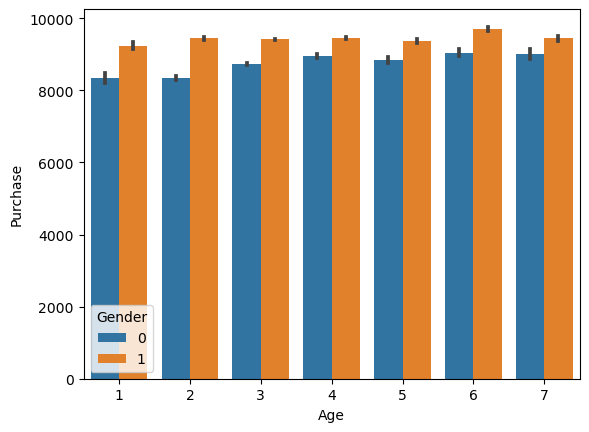

In [239]:
# visualization of the purchase by the woman is lower than man.
#sns.barplot("Age","Purchase",hue="Gender",data=df)
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

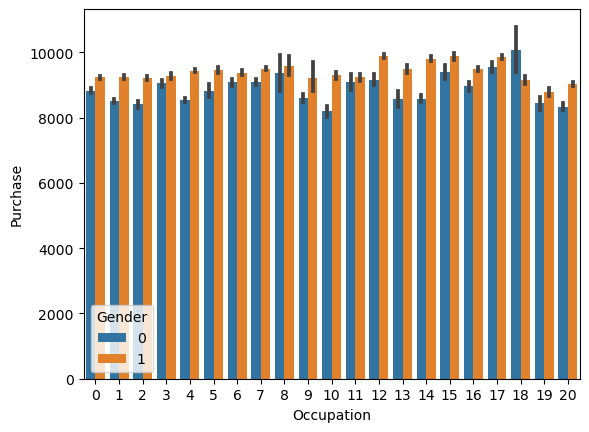

In [240]:
## visualization of purchase with occupation
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df)


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

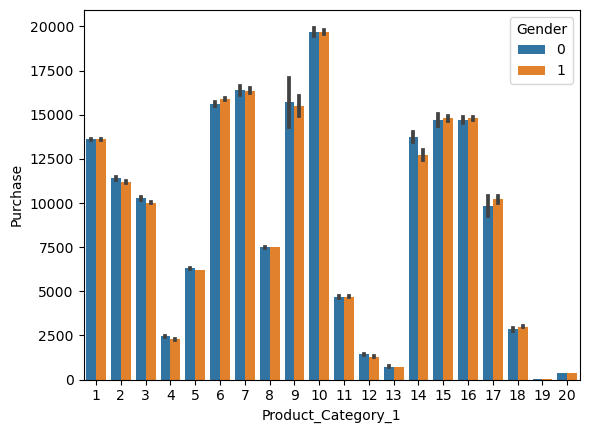

In [188]:
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

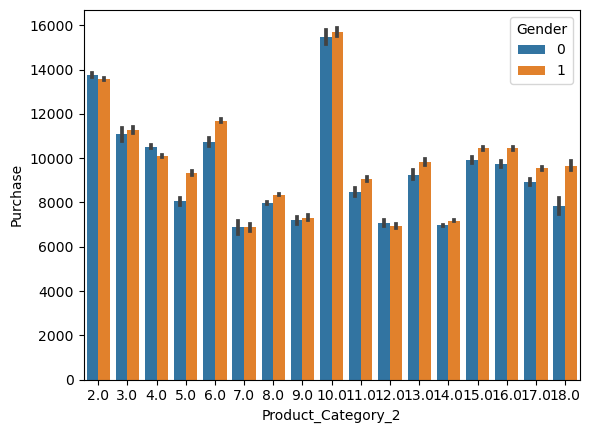

In [189]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

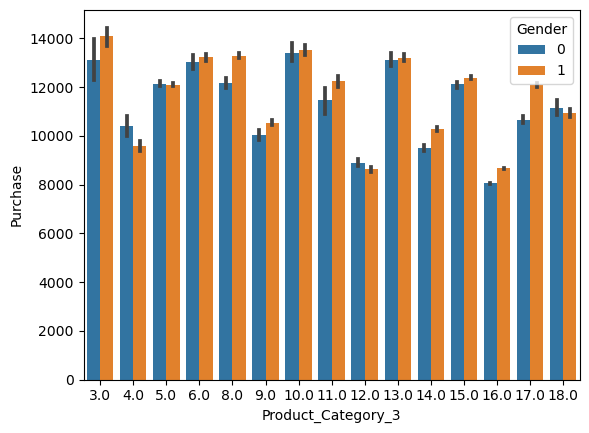

In [190]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=df)

In [191]:
# Observation product from category 2 are bought the most
# we can also drop the product id's


In [241]:

df_test=df[df["Purchase"].isnull()]

In [242]:
df_train=df[~df["Purchase"].isnull()]

In [243]:
X=df_train.drop('Purchase',axis=1)
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,2,0,3,8.0,16.0
1,0,1,10,2,0,1,6.0,14.0
2,0,1,10,2,0,12,8.0,16.0
3,0,1,10,2,0,12,14.0,16.0
4,1,7,16,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0
550064,0,3,1,3,0,20,8.0,16.0
550065,0,3,15,4,1,20,8.0,16.0
550066,0,7,1,2,0,20,8.0,16.0


In [244]:
y=df_train["Purchase"]
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [246]:
##let's do feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.57141282,  1.84716932,  1.67542193, ..., -1.11943802,
        -1.69098613,  0.36891877],
       [-1.75004823,  0.37105599,  0.44863199, ..., -1.11943802,
         1.33725797,  0.36891877],
       [-1.75004823,  0.37105599, -1.23820419, ...,  0.65927806,
         1.33725797,  0.36891877],
       ...,
       [ 0.57141282, -1.10505734, -0.93150671, ..., -0.61123342,
        -0.99216057,  0.36891877],
       [ 0.57141282,  0.37105599, -0.16476299, ..., -1.11943802,
        -1.69098613,  0.00373169],
       [ 0.57141282, -1.10505734, -0.62480922, ..., -1.11943802,
        -0.29333501,  0.36891877]])

In [247]:
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004758,0.116505,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346
Age,-0.004758,1.000000,0.090882,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839
Occupation,0.116505,0.090882,1.000000,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422
Marital_Status,-0.010945,0.310747,0.023563,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463
Product_Category_1,-0.046208,0.060336,-0.008441,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703
Product_Category_2,-0.011851,0.041716,0.001501,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651
Product_Category_3,-0.006651,0.036721,-0.001576,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000
